In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz

In [2]:
def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

In [3]:
labelsx = {0: 'a', 1: 'b', 2: 'c', 3: 'd'}
show_graph_with_labels(adjacency, labelsx)
print(labelsx)

NameError: name 'adjacency' is not defined

In [4]:
def dump_to_latex(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    # pos = nx.spectral_layout(gr)
    return nx.to_latex(gr)
    


In [5]:
datax = pd.read_excel("./QuadFormsData.xlsx", sheet_name="BiTriQuadri")
data_np = datax.iloc[0:, 1:].to_numpy()
data_np[np.isnan(data_np)] = 0
data_np.shape


(13, 13)

In [6]:
mv_labels = datax.iloc[:, 0]
mv_labels_lst = [lb for lb in mv_labels]
mv_labels_actual = {}
for i, lb in enumerate(mv_labels_lst):
    mv_labels_actual[i] = str(i) # lb
print(mv_labels_actual)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12'}


In [7]:
# show_graph_with_labels(data_np, {})
latex_code = dump_to_latex(data_np, mv_labels_actual)
%store latex_code >build/graph.tex

Writing 'latex_code' (str) to file 'build/graph.tex'.


In [12]:
def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    pos = nx.planar_layout(gr)
    nx.draw(gr, node_size=50, labels=mylabels,  pos=pos)
    plt.show()
mv_labels_actual   
#show_graph_with_labels(data_np, mv_labels_actual)

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: '10',
 11: '11',
 12: '12'}

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_20820\480547145.py:8: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(min_gr)


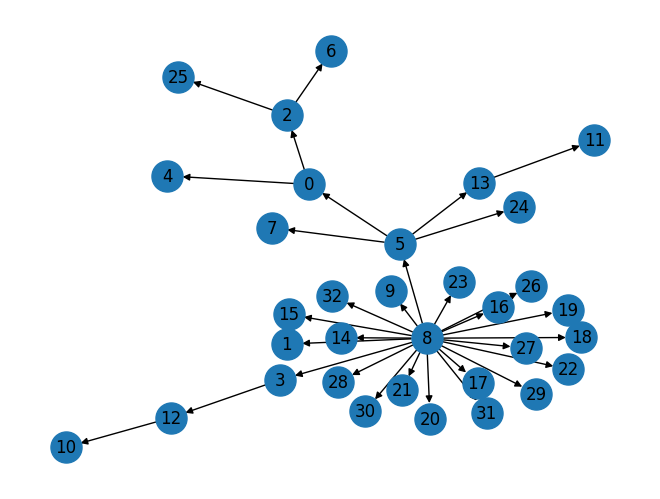

Writing 'latex_code[0]' (str) to file 'build/graph.tex'.
Writing 'latex_code[1]' (str) to file 'build/full_graph.tex'.


In [40]:
def find_edmonds_tree(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    edm = nx.algorithms.tree.branchings.Edmonds(gr)
    min_gr = edm.find_optimum(kind='max')
    pos = nx.nx_pydot.graphviz_layout(min_gr)
    nx.draw(min_gr, node_size=500, labels=mylabels, with_labels=True, pos=pos)
    plt.show()
    latex_strs = []
    latex_strs.append(
        nx.to_latex(
            min_gr, 
            pos=pos, tikz_options="[scale=0.03]", 
            document_wrapper='\\documentclass{{standalone}}\n\\usepackage{{tikz}}\n\\usepackage{{subcaption}}\n\n\\begin{{document}}\n{content}\n\\end{{document}}',
            figure_wrapper='\n{content}\n'
        )
    )
    latex_strs.append(
        nx.to_latex(
            gr, 
            pos=pos, tikz_options="[scale=0.03]", 
            document_wrapper='\\documentclass{{standalone}}\n\\usepackage{{tikz}}\n\\usepackage{{subcaption}}\n\n\\begin{{document}}\n{content}\n\\end{{document}}',
            figure_wrapper='\n{content}\n'
        )
    )
    return latex_strs
    
latex_code = find_edmonds_tree(data_np, mv_labels_actual)

%store latex_code[0] >build/graph.tex
%store latex_code[1] >build/full_graph.tex
    

###  Options
1. We present a minimized "Complete info" graph in the following sense:
    - Take the maximal spanning out tree and add paths that are missing from the complete tree.
    - We do this by iterating through edges and asking is the target reachable from the source in our current maximal tree?
        - If YES: Do nothing
        - If NO: add the missing edge

2. Present a Lossy but good looking graph.
    - Graph with the zero crossings (maximal planar graph). *What is the maximum no of edges we can keep without having crossings
    - Graph with small number of subjectively chosen crossings.
        - Perimeter crossings ok. Inner crossings bad.

In [57]:
def GenerateCommunicability(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    edm = nx.algorithms.tree.branchings.Edmonds(gr)
    min_gr = edm.find_optimum(kind='max')
    length = dict(nx.all_pairs_shortest_path_length(min_gr))
    R = np.array([[length.get(m, {}).get(n, 0) > 0 for m in min_gr.nodes] for n in min_gr.nodes], dtype=np.int32)
    return R


R = GenerateCommunicability(data_np, mv_labels_actual)
R, np.count_nonzero(R)


(array([[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 51)

In [9]:
def minimumGraph(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    edm = nx.algorithms.tree.branchings.Edmonds(gr)
    min_gr = edm.find_optimum(kind='max')
    return min_gr

def GenerateCommunicability(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    edm = nx.algorithms.tree.branchings.Edmonds(gr)
    min_gr = edm.find_optimum(kind='max')
    length = dict(nx.all_pairs_shortest_path_length(min_gr))
    R = np.array([[length.get(m, {}).get(n, 0) > 0 for m in min_gr.nodes] for n in min_gr.nodes], dtype=np.int32)
    return R

def GenerateCommunicabilityFull(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    
    length = dict(nx.all_pairs_shortest_path_length(gr))
    R = np.array([[length.get(m, {}).get(n, 0) > 0 for m in gr.nodes] for n in gr.nodes], dtype=np.int32)
    return R

R1 = GenerateCommunicabilityFull(data_np, mv_labels_actual)
Rmin = GenerateCommunicability(data_np, mv_labels_actual)
R = Rmin

min_gr2=minimumGraph(data_np, mv_labels_actual)

for i in range(len(R)):
    for j in range(len(R)):
        if R1[i][j] != R[i][j]:
            edges = zip([i], [j])
            min_gr2.add_edges_from(edges)
            length = dict(nx.all_pairs_shortest_path_length(min_gr2))
            R = np.array([[length.get(m, {}).get(n, 0) > 0 for m in min_gr2.nodes] for n in min_gr2.nodes], dtype=np.int32)
            
np.count_nonzero(R1), np.count_nonzero(Rmin), np.count_nonzero(R)

(180, 42, 992)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_20820\3933622175.py:1: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(min_gr2)


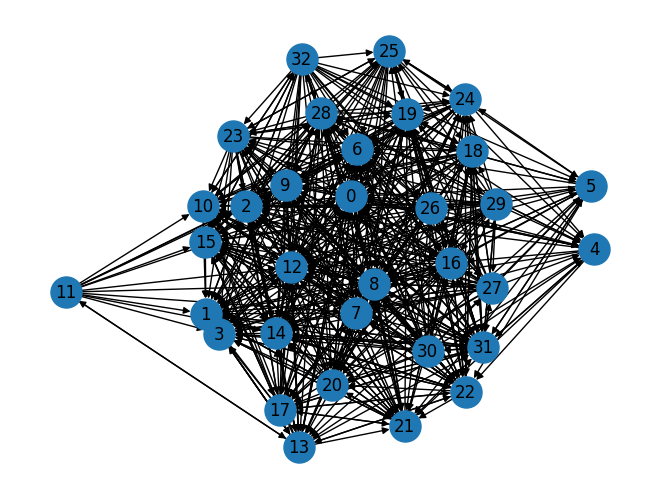

In [71]:
pos = nx.nx_pydot.graphviz_layout(min_gr2)
nx.draw(min_gr2, node_size=500, labels=mv_labels_actual, with_labels=True, pos=pos)
plt.show()